In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import json
import warnings
warnings.filterwarnings('ignore')

# Analysis of my Playlists

In [2]:
with open("my_spotify_data\Playlist1.json") as json_data:
    playlist = json.load(json_data)

In [3]:
playlist.keys()

dict_keys(['playlists'])

In [4]:
playlist_df = pd.DataFrame(playlist['playlists'])
playlist_df.head()

,name,lastModifiedDate,items,description,numberOfFollowers
0,Latte's Mix,2023-02-09,[{'track': {'trackName': 'All Gone (No Escape)...,çöplüğümde her türden müzik bulunur.,5
1,Deniz,2023-01-31,"[{'track': {'trackName': 'Estampes, L. 100: I....",hüzün ve düşünce,0
2,gece yarısı tavan manzarası,2022-12-27,"[{'track': {'trackName': 'No Surprises', 'arti...",None,1
3,Dinlenmiş podcastler,2023-02-09,"[{'track': None, 'episode': {'episodeName': 'A...","ne dinlediğimi hatırlamak, ara ara yeniden uğr...",0
4,.?,2023-01-03,"[{'track': {'trackName': 'True Blue', 'artistN...",None,0


In [5]:
playlist_df["items"][0][0]

{'track': {'trackName': 'All Gone (No Escape)',
  'artistName': 'Gustavo Santaolalla',
  'albumName': 'The Last of Us',
  'trackUri': 'spotify:track:6zezOLouSWKEfMizbzcsad'},
 'episode': None,
 'localTrack': None,
 'addedDate': '2017-11-26'}

In [6]:
lenlist = []
for i in range(len(playlist_df["name"])):
    print(f"Number of songs in {playlist_df['name'][i]}: {len(playlist_df['items'][i])}")
    lenlist.append(len(playlist_df['items'][i]))


Number of songs in Latte's Mix: 2501
Number of songs in Deniz: 46
Number of songs in gece yarısı tavan manzarası: 32
Number of songs in Dinlenmiş podcastler: 21
Number of songs in .?: 3
Number of songs in Villian : 6
Number of songs in neon city lights: 21
Number of songs in YERIMDE DURAMIYORUM: 5
Number of songs in bi ayrı: 51
Number of songs in hoş klasik: 56
Number of songs in baassBBWAAAAAAAAAAASS: 39
Number of songs in my wholesome romance: 10
Number of songs in Tatlı: 20
Number of songs in irmik tatlısı: 54
Number of songs in Jazz Jazz Jazz!: 46
Number of songs in Sad Lisa: 11
Number of songs in Ktü'den Dört Atlı Geçti: 14
Number of songs in Buruk: 6
Number of songs in Instrumental: 399
Number of songs in nostalji: 18
Number of songs in Serotonin: 18
Number of songs in Chillin': 11
Number of songs in huzur ve sükunet: 63
Number of songs in Sadece Klasik: 182
Number of songs in Sakin: 167


In [7]:
playlist_dict = {}
for i in range(len(playlist_df["name"])):
    playlist_dict[playlist_df["name"][i]] = len(playlist_df["items"][i])

playlist_dict = {k: v for k, v in sorted(playlist_dict.items(), key=lambda item: item[1], reverse=True)}
playlist_dict

{"Latte's Mix": 2501,
 'Instrumental': 399,
 'Sadece Klasik': 182,
 'Sakin': 167,
 'huzur ve sükunet': 63,
 'hoş klasik': 56,
 'irmik tatlısı': 54,
 'bi ayrı': 51,
 'Deniz': 46,
 'Jazz Jazz Jazz!': 46,
 'baassBBWAAAAAAAAAAASS': 39,
 'gece yarısı tavan manzarası': 32,
 'Dinlenmiş podcastler': 21,
 'neon city lights': 21,
 'Tatlı': 20,
 'nostalji': 18,
 'Serotonin': 18,
 "Ktü'den Dört Atlı Geçti": 14,
 'Sad Lisa': 11,
 "Chillin'": 11,
 'my wholesome romance': 10,
 'Villian ': 6,
 'Buruk': 6,
 'YERIMDE DURAMIYORUM': 5,
 '.?': 3}

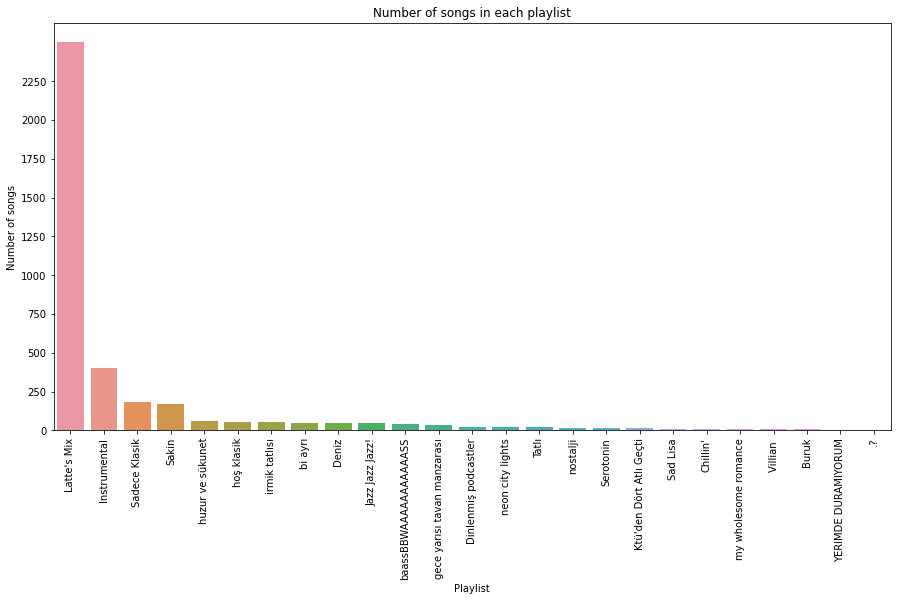

In [8]:
plt.figure(figsize=(15, 7.5))
sns.barplot(x=list(playlist_dict.keys()), y=list(playlist_dict.values()))
plt.title("Number of songs in each playlist")
plt.xlabel("Playlist")
plt.ylabel("Number of songs")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 2500, 250))
plt.show()

In [9]:
playlist_df["items"][0][0]["track"]["artistName"]

'Gustavo Santaolalla'

In [10]:
# artist_list = []
# for i in range(len(playlist_df["name"])):
#     for j in range(len(playlist_df["items"][i])):
#         print(playlist_df["items"][i][j]["track"]["artistName"])

In [11]:
#get a error but i didnt solve it yet

# artist_dict = {}
# for i in range(len(playlist_df["name"])):
#     for j in range(len(playlist_df["items"][i])):
#         artist = playlist_df["items"][i][j]["track"]["artistName"]
#         if artist in artist_dict:
#             artist_dict[artist] += 1
#         else:
#             artist_dict[artist] = 1

# artist_dict = {k: v for k, v in sorted(artist_dict.items(), key=lambda item: item[1], reverse=True)}
# artist_dict

In [12]:
playlist_df["items"][0][0]["addedDate"]

'2017-11-26'

In [13]:
dateList = []
for i in range(len(playlist_df["name"])):
    for j in range(len(playlist_df["items"][i])):
        dateList.append(playlist_df["items"][i][j]["addedDate"][0:4])
dateList


dateDict = {}
for i in range(len(dateList)):
    dateDict[dateList[i]] = dateList.count(dateList[i])

dateDict = {k: v for k, v in sorted(dateDict.items(), key=lambda item: item[1], reverse=True)}
dateDict


{'2021': 1290,
 '2022': 990,
 '2019': 481,
 '2020': 385,
 '2018': 334,
 '2017': 252,
 '2023': 68}

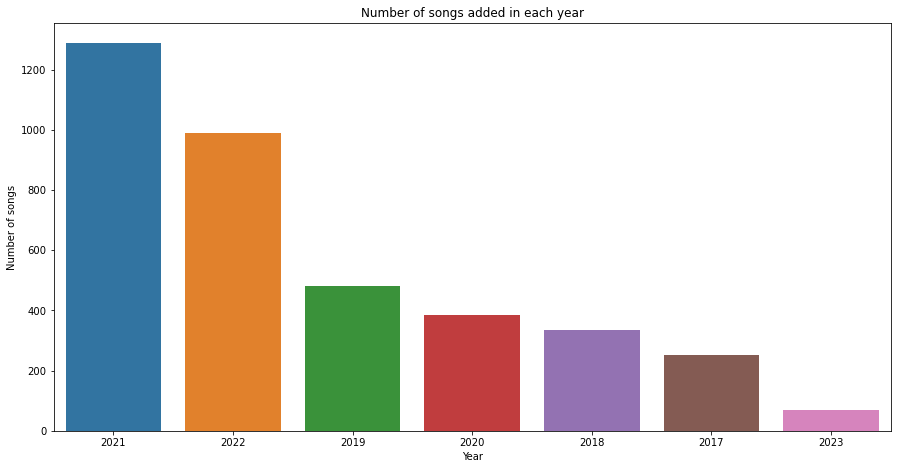

In [14]:
plt.figure(figsize=(15, 7.5))
sns.barplot(x=list(dateDict.keys()), y=list(dateDict.values()))
plt.title("Number of songs added in each year")
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.show()

# Analysis of my Streaming History

In [15]:


streaminghistory = []
for i in range(0, 4):
    with open("my_spotify_data\StreamingHistory" + str(i) + ".json") as json_data:
        streaminghistory.append(json.load(json_data))

In [16]:
streaminghistory = [item for sublist in streaminghistory for item in sublist]

In [17]:
pd_sthistory = pd.DataFrame(streaminghistory)
print(pd_sthistory.shape)
pd_sthistory.head()

(33525, 4)


,endTime,artistName,trackName,msPlayed
0,2022-02-06 18:23,Mitski,First Love/Late Spring,248221
1,2022-02-07 16:50,C418,Sweden,64947
2,2022-02-08 14:37,League of Legends,"Gwen, the Hallowed Seamstress",5780
3,2022-02-09 00:15,Critical Role,C3E1 The Draw of Destiny,36548
4,2022-02-09 09:13,League of Legends,"Gwen, the Hallowed Seamstress",880


In [18]:
ordered_time = pd_sthistory.sort_values(by=['msPlayed'], ascending=False)
ordered_time.iloc[50]

endTime       2023-01-22 13:45
artistName              Beirut
trackName         Elephant Gun
msPlayed                697999
Name: 32373, dtype: object

In [19]:
msplayed = pd_sthistory.groupby(["trackName","artistName"],as_index=False)["msPlayed"].sum()
msplayed = msplayed.sort_values(by=['msPlayed'], ascending=False)

In [20]:
toptwenty = msplayed.iloc[0:20]
toptwenty["trackName"] = toptwenty["trackName"].apply(lambda x: x + " - ")
toptwenty["msPlayed"] = toptwenty["msPlayed"].apply(lambda x: x*(1.666667*(10**-5)))
toptwenty["msPlayed"] = toptwenty["msPlayed"].apply(lambda x: round(x, 2))
toptwenty.rename(columns={"msPlayed": "minPlayed"}, inplace=True)
toptwenty["song_auth"] = toptwenty["trackName"] + toptwenty["artistName"]
toptwenty


,trackName,artistName,minPlayed,song_auth
157,Adamın Dibi -,mor ve ötesi,193.29,Adamın Dibi - mor ve ötesi
4585,Youth -,Glass Animals,145.78,Youth - Glass Animals
4050,There Is a Light That Never Goes Out - 2011 Re...,The Smiths,143.08,There Is a Light That Never Goes Out - 2011 Re...
4579,Young and Restless -,SIAMES,140.71,Young and Restless - SIAMES
236,Always The Same -,SIAMES,132.73,Always The Same - SIAMES
4176,True Blue -,Widowspeak,128.91,True Blue - Widowspeak
268,Animals -,Maroon 5,127.95,Animals - Maroon 5
1809,I Ain't Worried -,OneRepublic,125.73,I Ain't Worried - OneRepublic
2090,KICK BACK -,Kenshi Yonezu,122.05,KICK BACK - Kenshi Yonezu
2839,Olsun -,Pilli Bebek,119.97,Olsun - Pilli Bebek


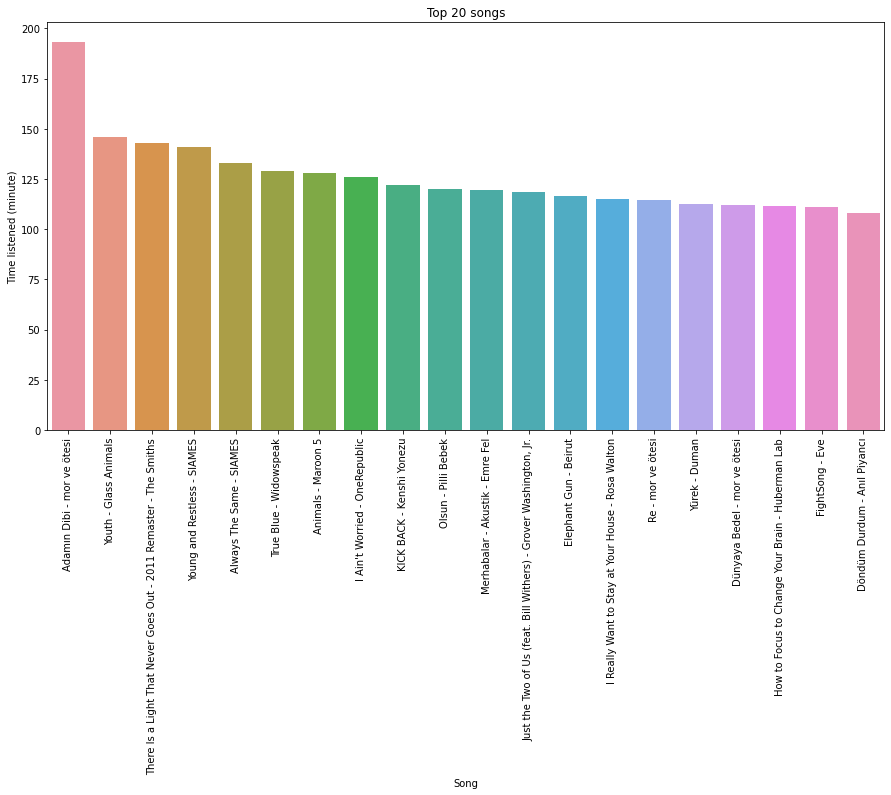

In [21]:
plt.figure(figsize=(15, 7.5))
sns.barplot(x=toptwenty["song_auth"], y=toptwenty["minPlayed"])
plt.title("Top 20 songs")
plt.xlabel("Song")
plt.ylabel("Time listened (minute)")
plt.xticks(rotation=90)
plt.show()

In [22]:
ordered_artist = pd_sthistory.groupby(["artistName"],as_index=False)["msPlayed"].sum()
ordered_artist["msPlayed"] = ordered_artist["msPlayed"].apply(lambda x: x*(1.666667*(10**-5)))
ordered_artist["msPlayed"] = ordered_artist["msPlayed"].apply(lambda x: round(x, 2))
ordered_artist.rename(columns={"msPlayed": "minPlayed"}, inplace=True)
ordered_artist = ordered_artist.sort_values(by=['minPlayed'], ascending=False)
ordered_artist = ordered_artist.iloc[0:25]

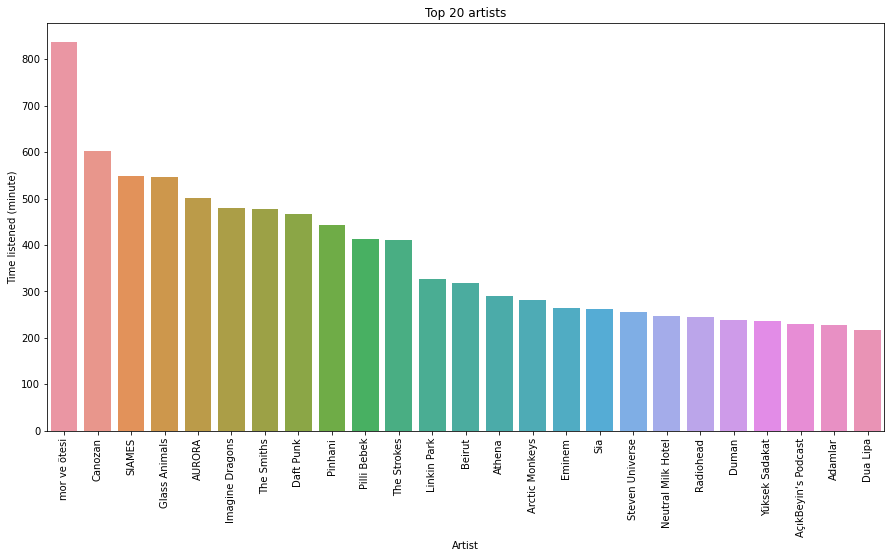

In [23]:
plt.figure(figsize=(15, 7.5))
sns.barplot(x=ordered_artist["artistName"], y=ordered_artist["minPlayed"])
plt.title("Top 20 artists")
plt.xlabel("Artist")
plt.ylabel("Time listened (minute)")
plt.xticks(rotation=90)
plt.show()

In [24]:
#i will ad genre stats later